# Business Understanding

This South korean company produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), we need to predict the Usage in killo watt per hour which is a target column which depends on various factors mentioned as features in dataset below.

source: UCI ML Repository(from where data is taken)

# Data Mining

In [1]:
#importing various libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sweetviz as sv

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
data=pd.read_csv("Steel_industry_data.csv")

In [3]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
data.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [5]:
print("Number of records: ",data.shape[0])
print("Number of features: ",data.shape[1])

Number of records:  35040
Number of features:  11


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

# Data Cleaning

In [7]:
data.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [9]:
#hence no null values present

# Exploratory Data Analysis-EDA

In [10]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Usage_kWh,35040.0,27.386892,33.444380,0.0,3.20,4.57,51.2375,157.18
Lagging_Current_Reactive.Power_kVarh,35040.0,13.035384,16.306000,0.0,2.30,5.00,22.6400,96.91
Leading_Current_Reactive_Power_kVarh,35040.0,3.870949,7.424463,0.0,0.00,0.00,2.0900,27.76
CO2(tCO2),35040.0,0.011524,0.016151,0.0,0.00,0.00,0.0200,0.07
Lagging_Current_Power_Factor,35040.0,80.578056,18.921322,0.0,63.32,87.96,99.0225,100.00
Leading_Current_Power_Factor,35040.0,84.367870,30.456535,0.0,99.70,100.00,100.0000,100.00
NSM,35040.0,42750.000000,24940.534317,0.0,21375.00,42750.00,64125.0000,85500.00


<AxesSubplot:xlabel='Usage_kWh', ylabel='Count'>

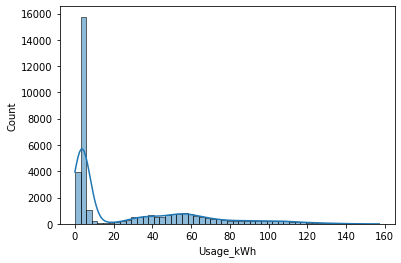

In [12]:
sns.histplot(x=data['Usage_kWh'],kde=True)

In [13]:
data.Usage_kWh.skew()

1.197393822769221

In [14]:
report=sv.analyze(data)

                                             |                                             | [  0%]   00:00 ->…


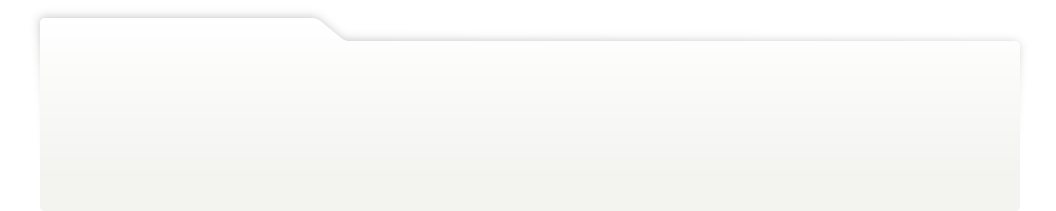
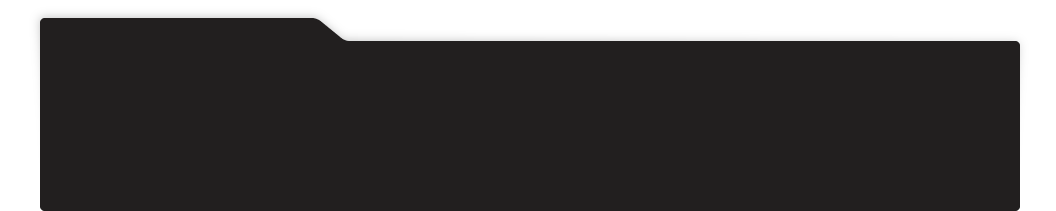
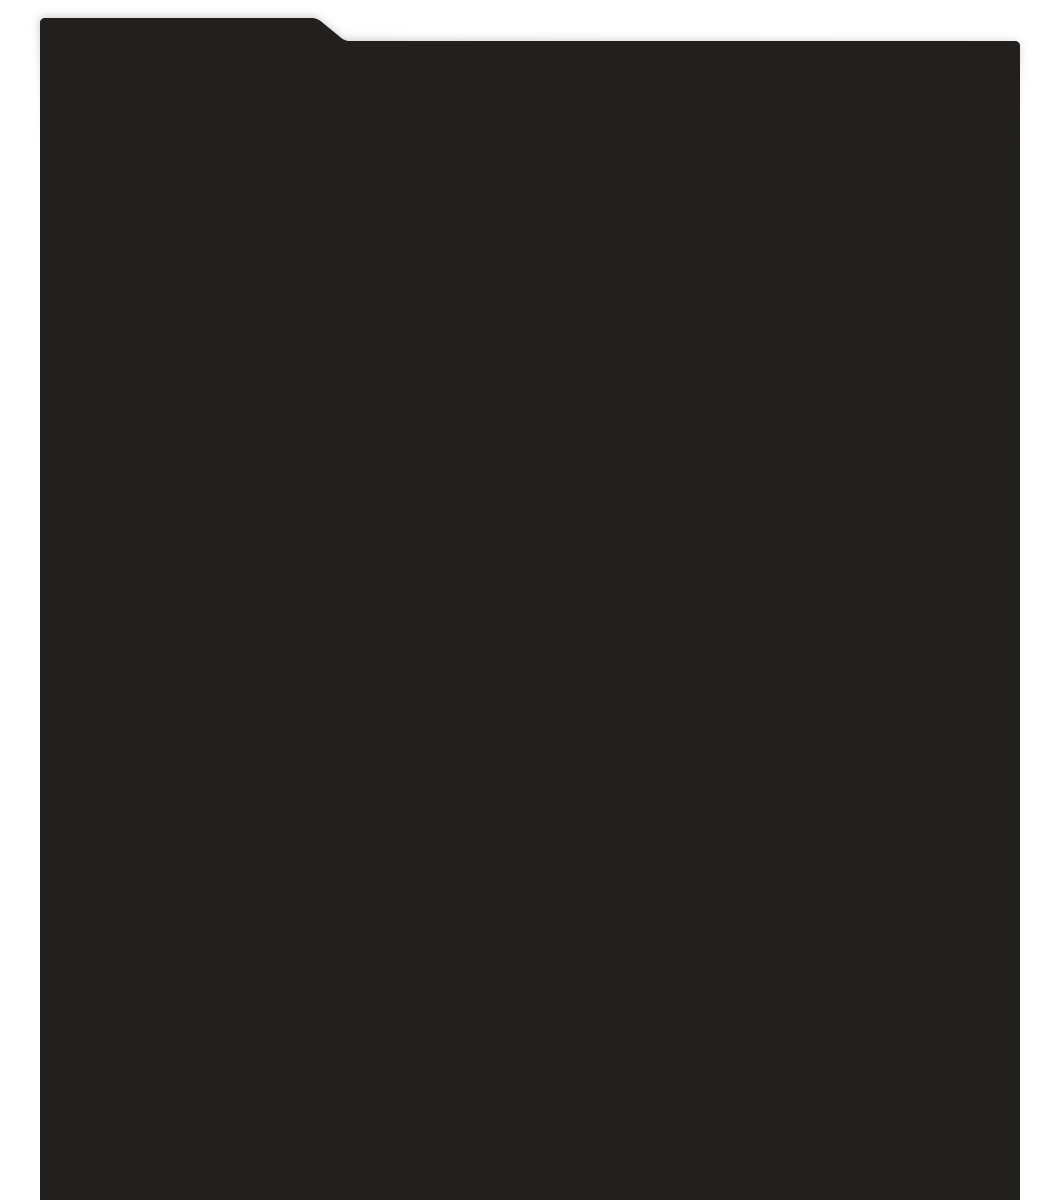
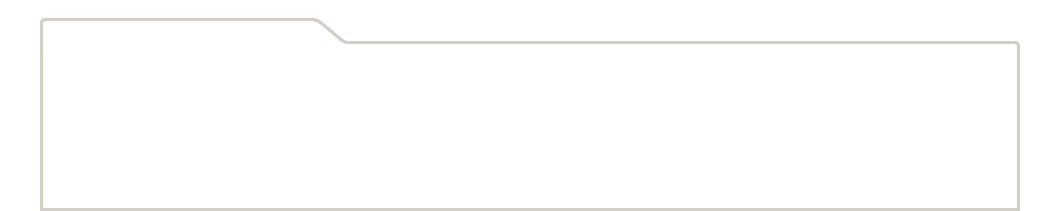
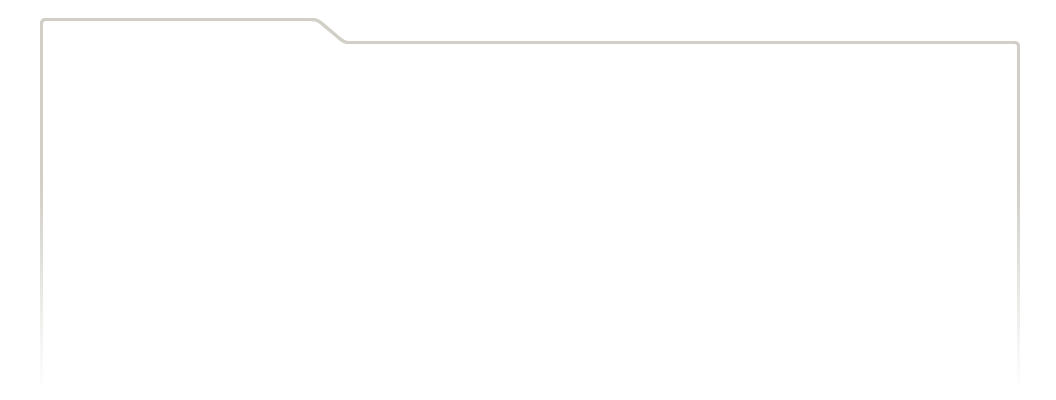
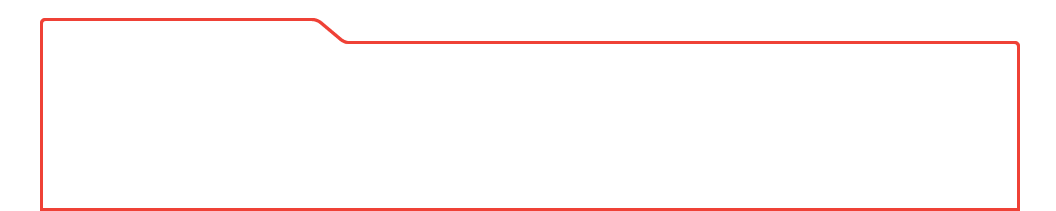
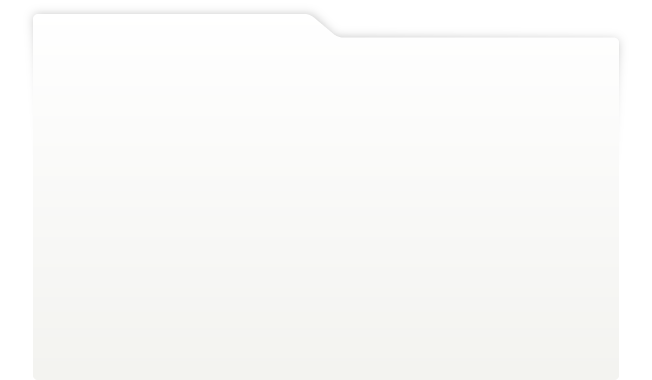
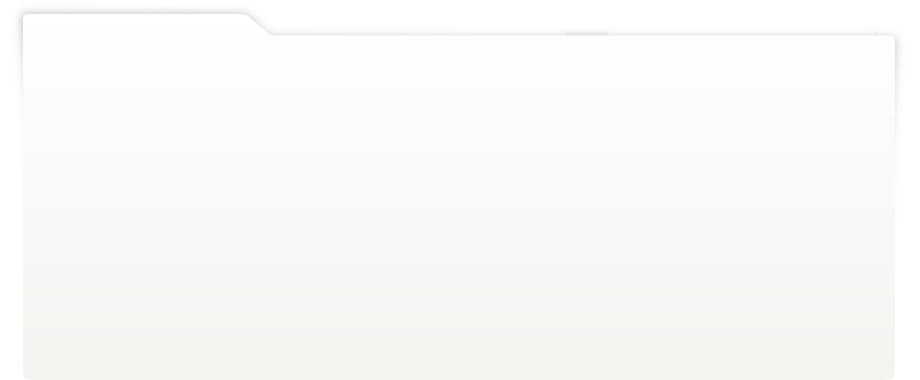
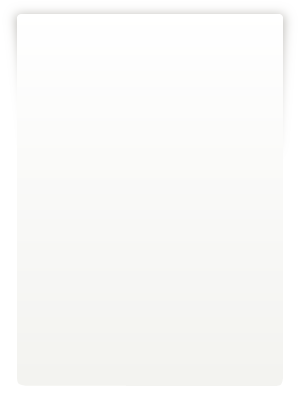
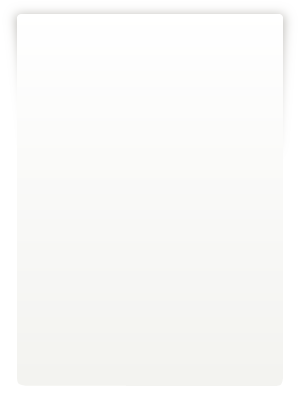
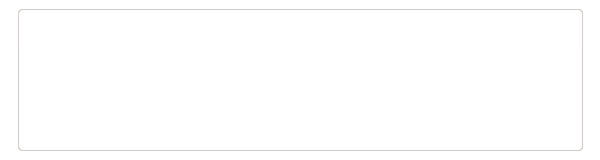
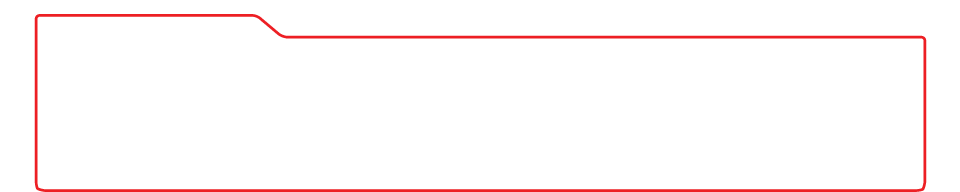
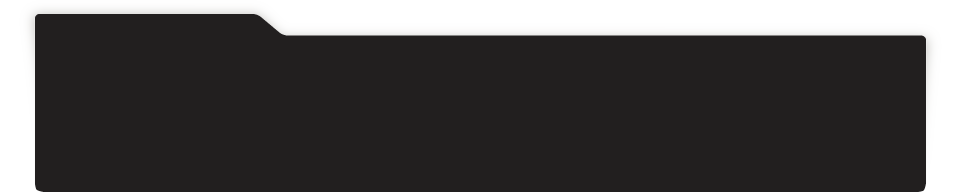
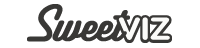
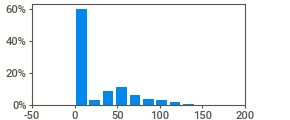
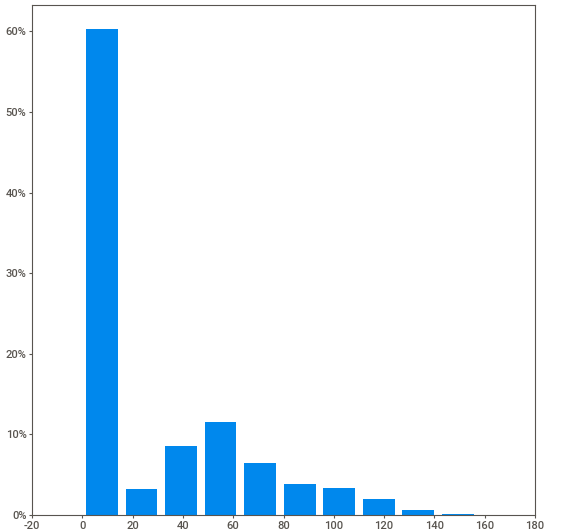
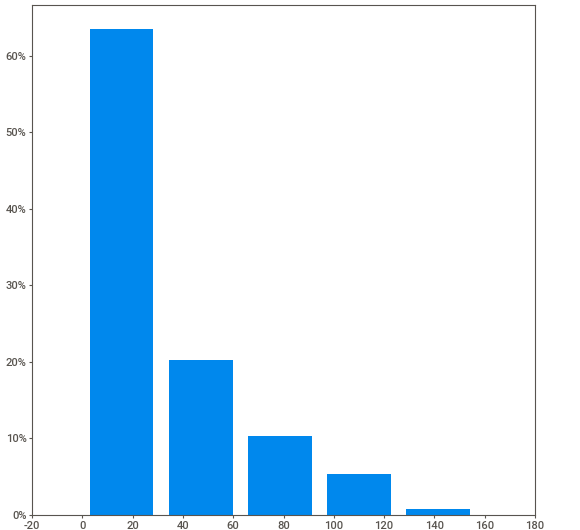
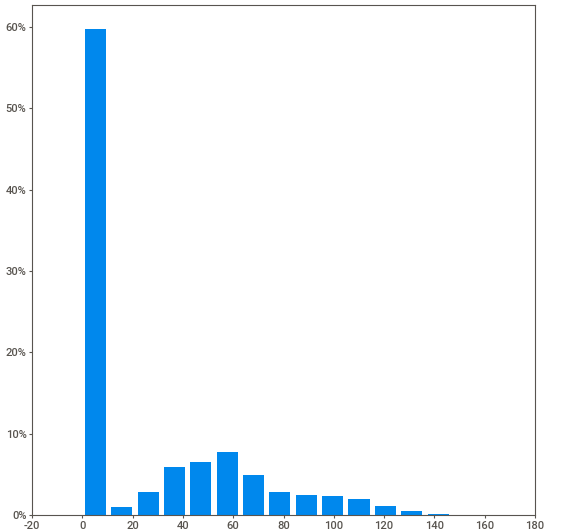
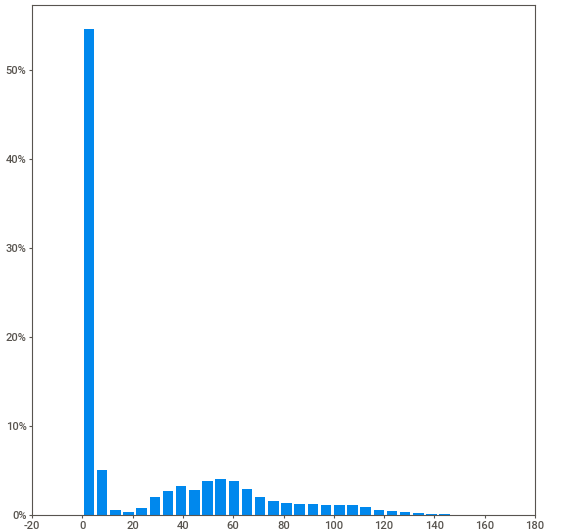
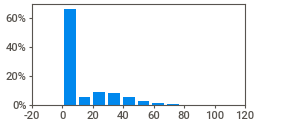
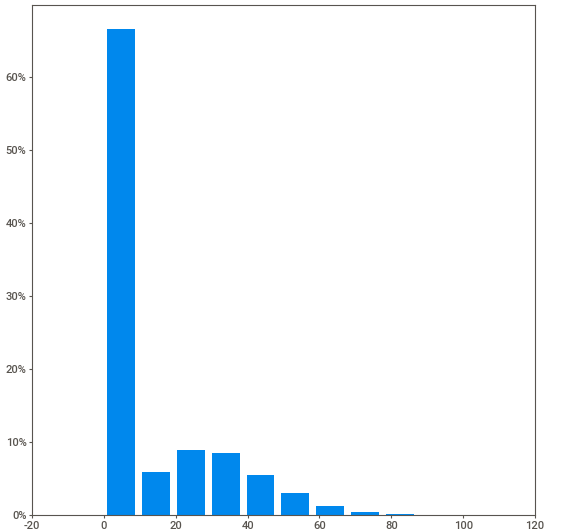
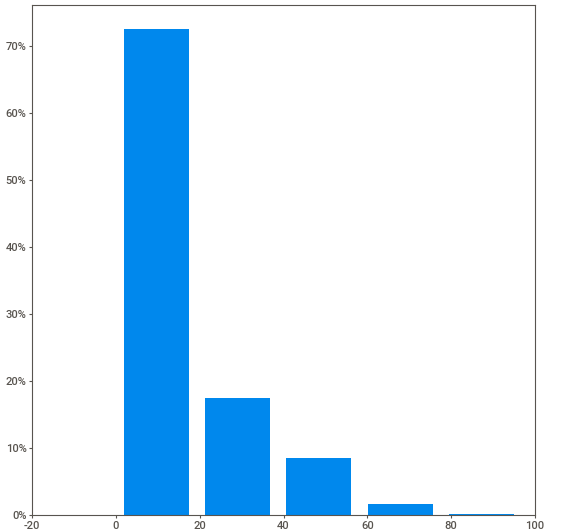
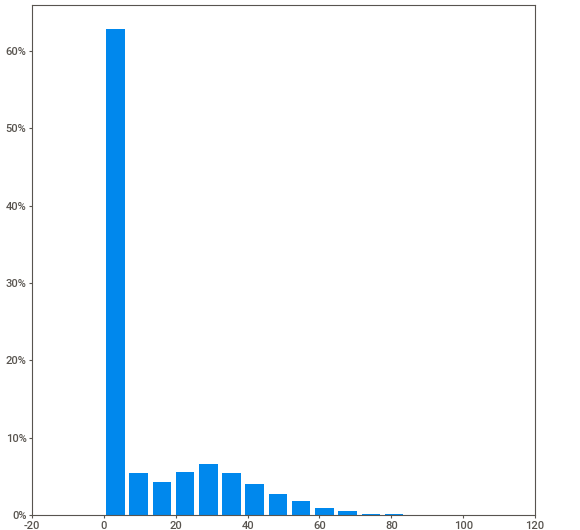
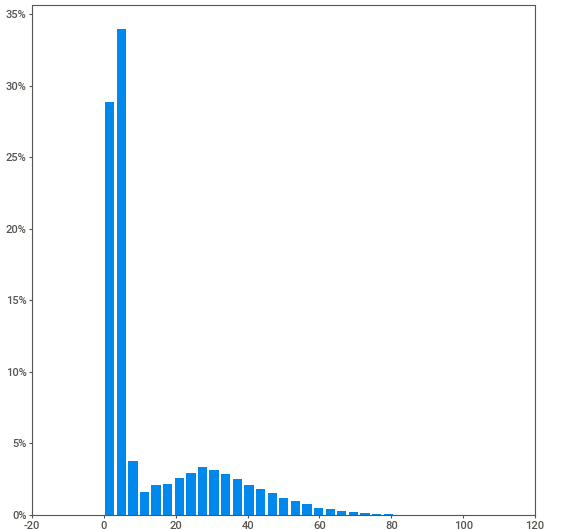
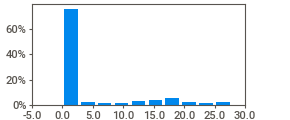
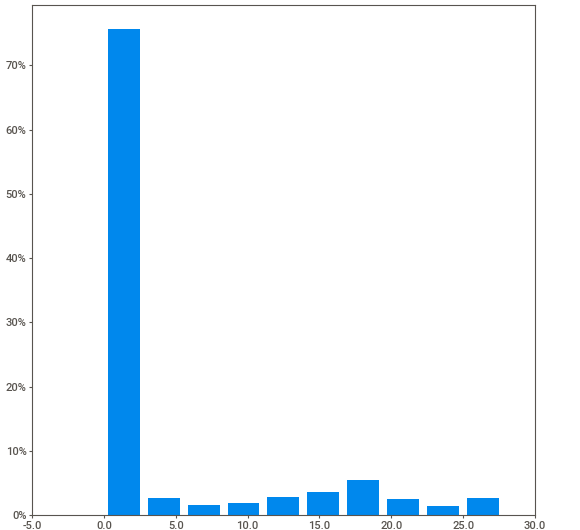
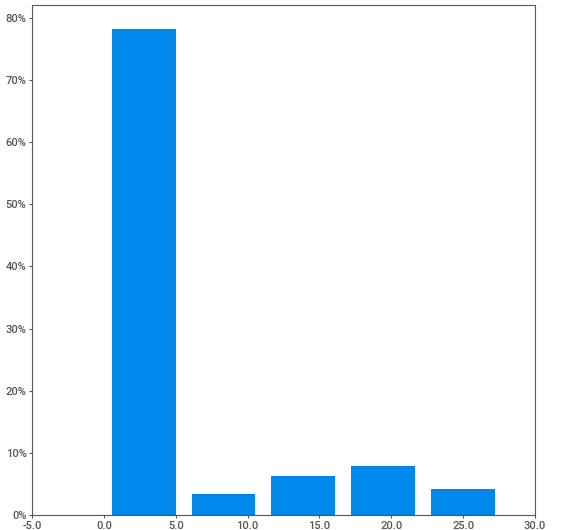
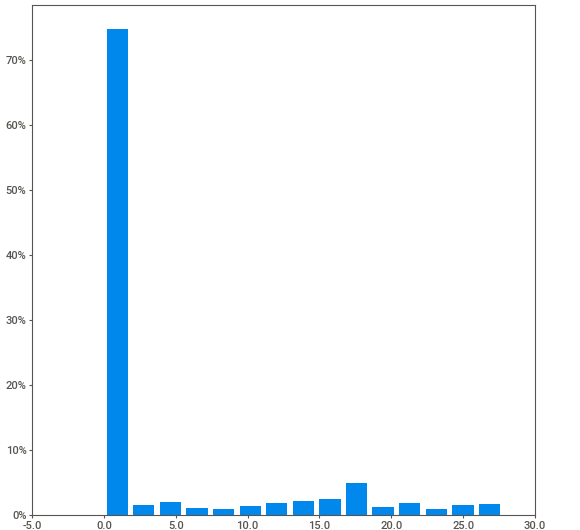
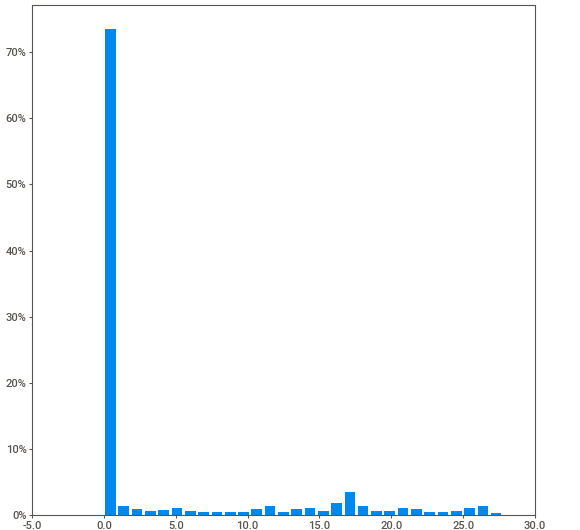
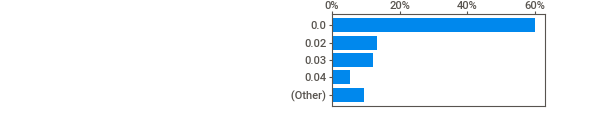
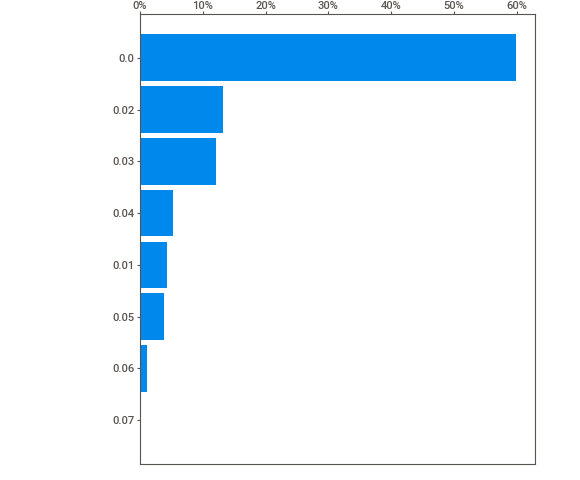
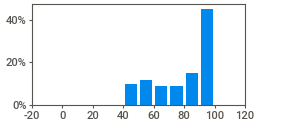
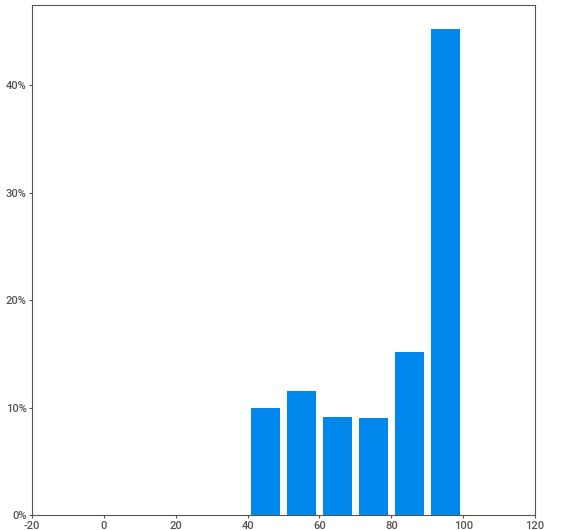
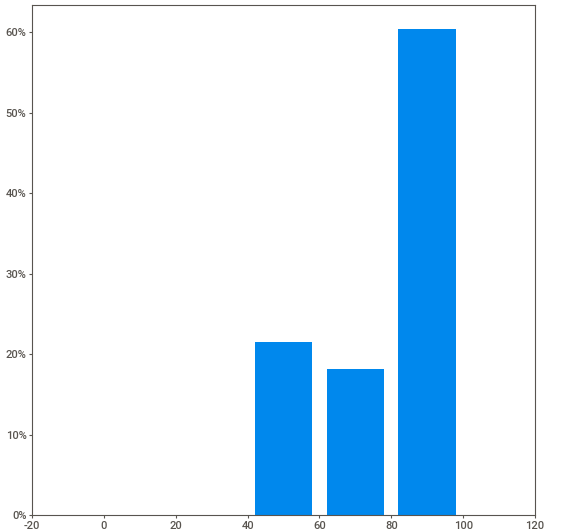
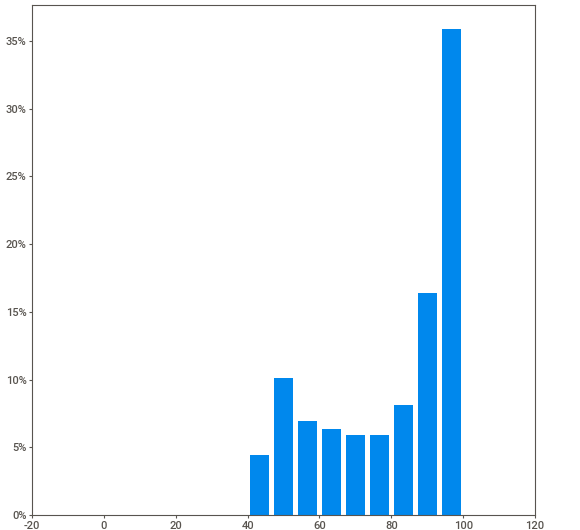
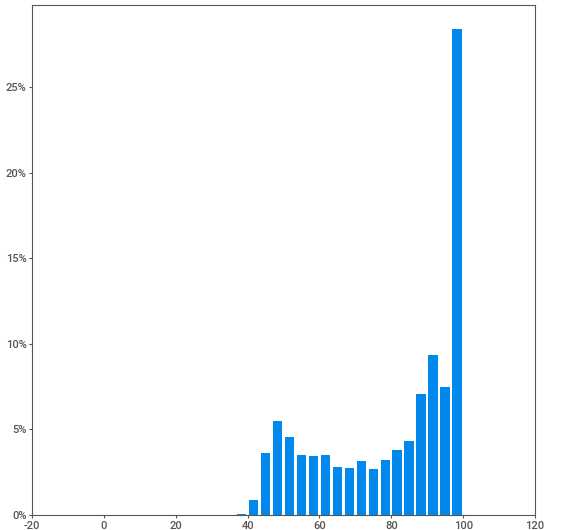
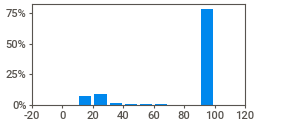
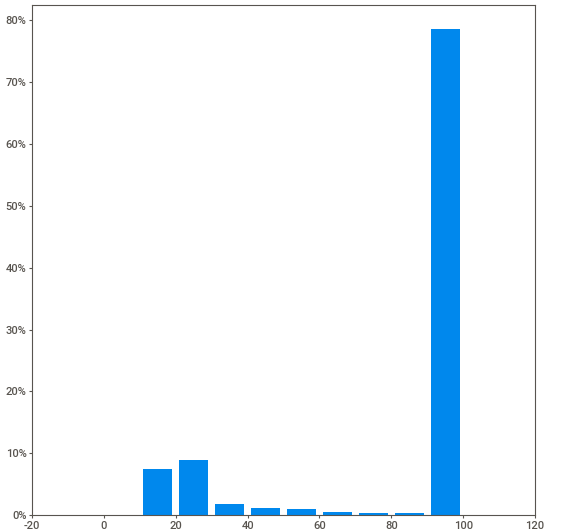
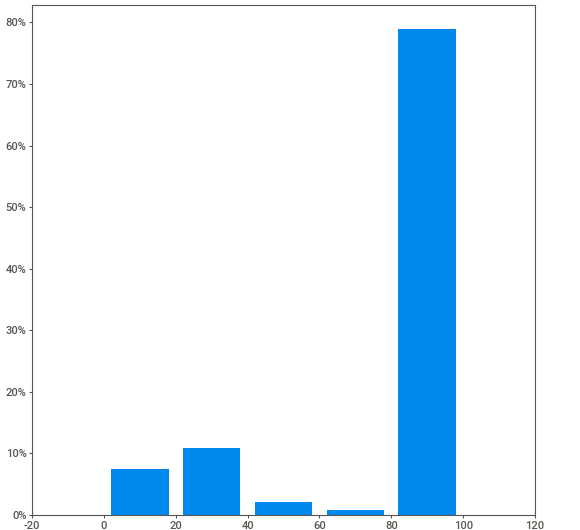
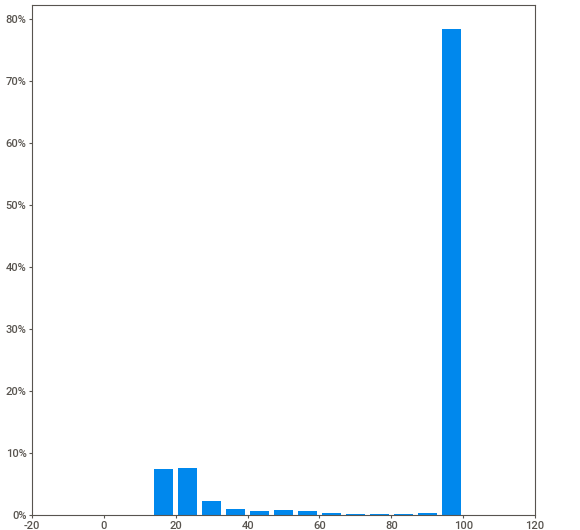
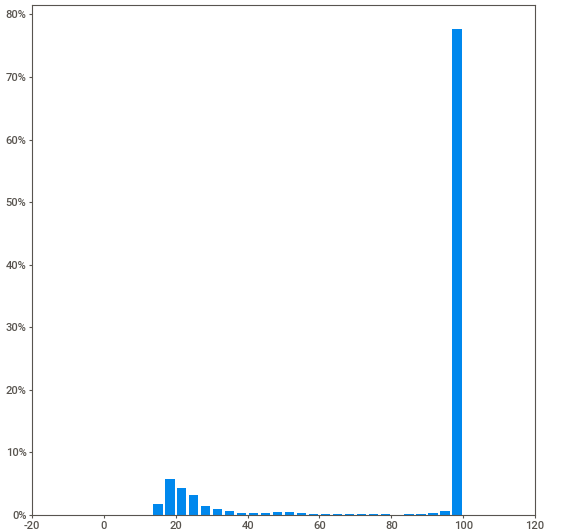
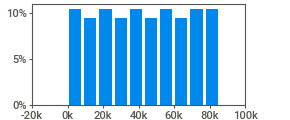
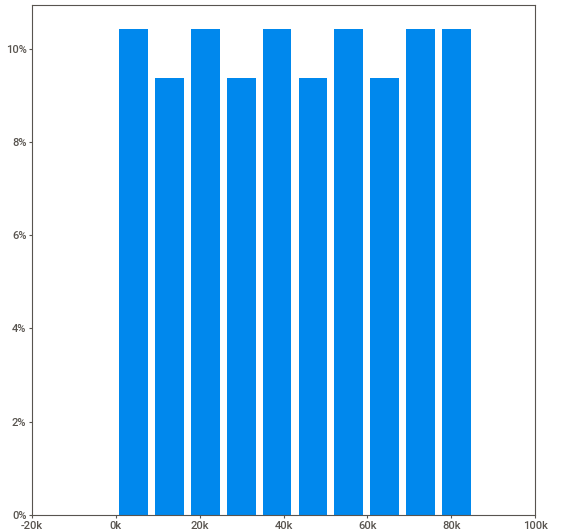
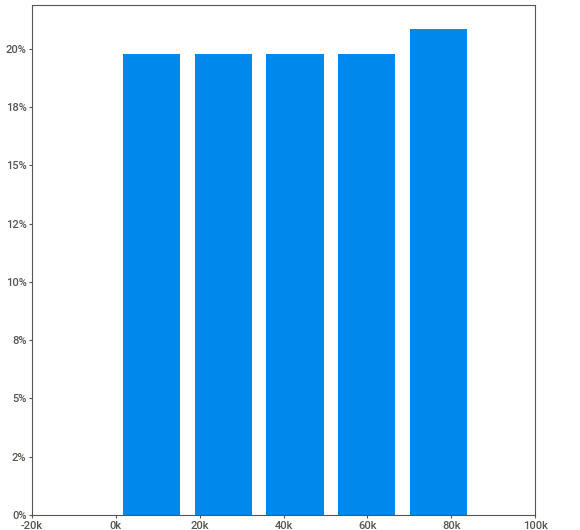
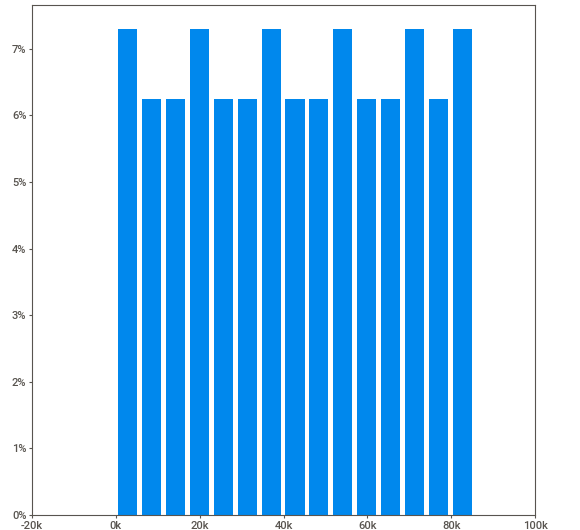
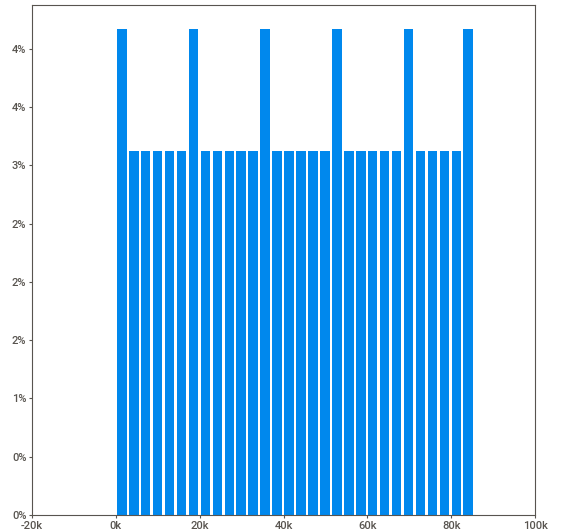
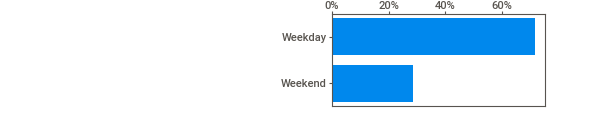
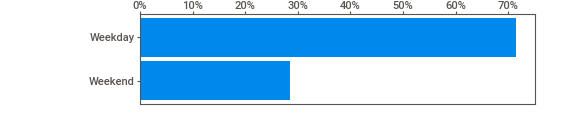
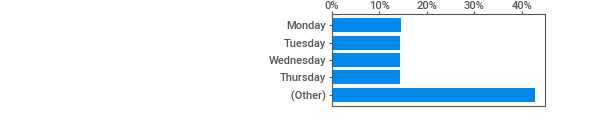
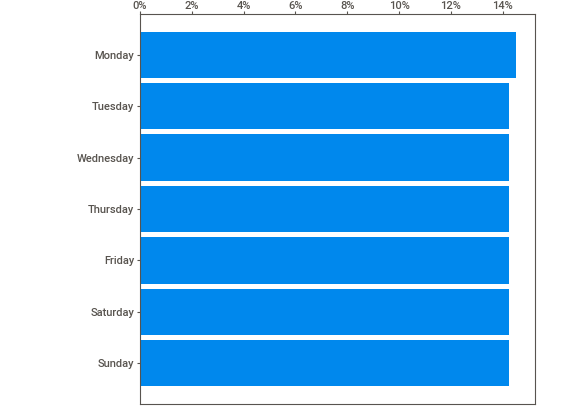
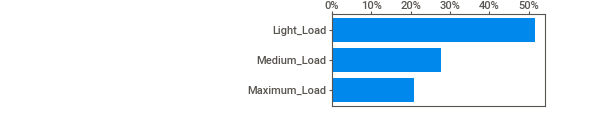
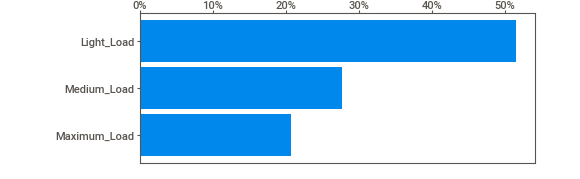
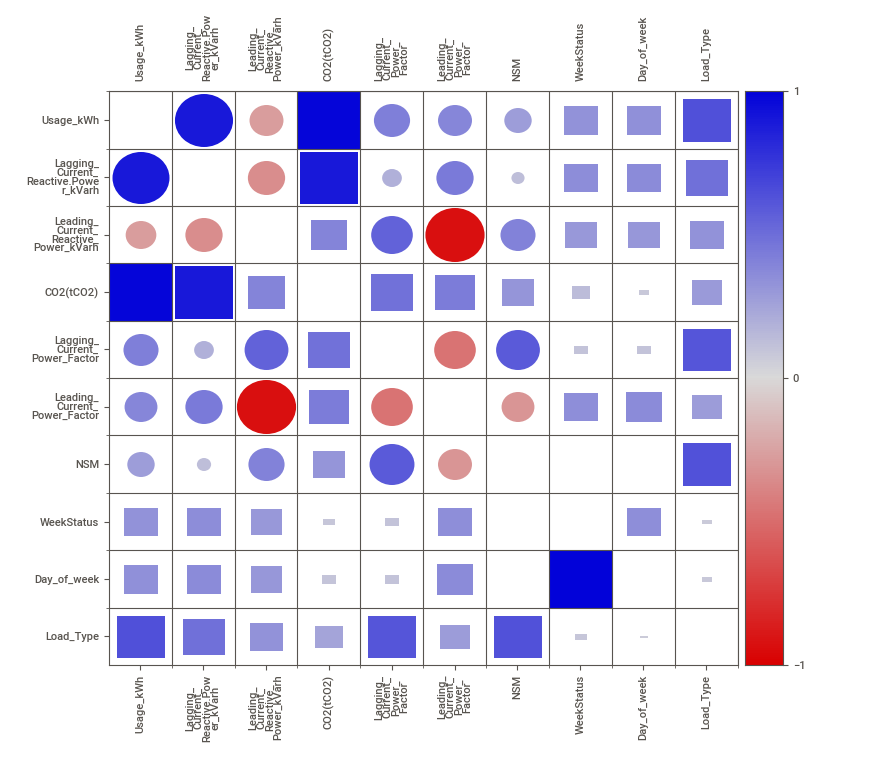
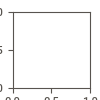

In [15]:
report.show_notebook()

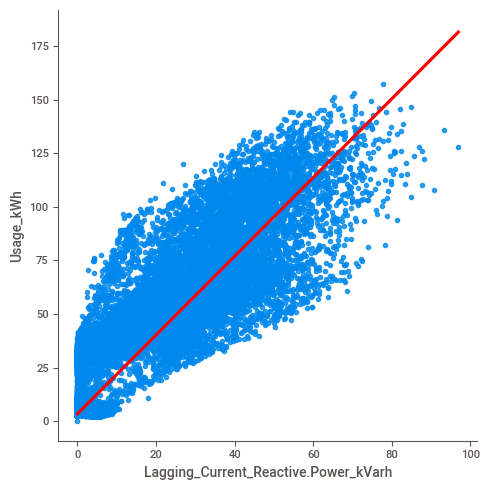

In [16]:
sns.lmplot(x='Lagging_Current_Reactive.Power_kVarh',y='Usage_kWh',data=data,line_kws={'color':'red'})

<AxesSubplot:xlabel='Day_of_week', ylabel='Usage_kWh'>

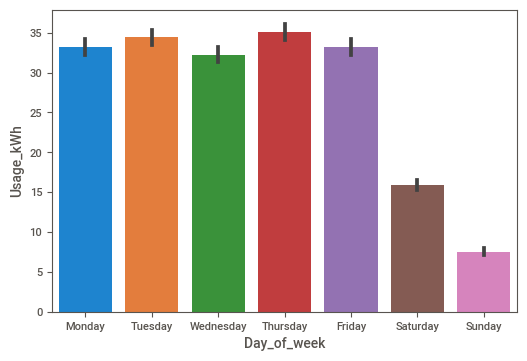

In [17]:
sns.barplot(x='Day_of_week',y='Usage_kWh',data=data)

<AxesSubplot:xlabel='WeekStatus', ylabel='Usage_kWh'>

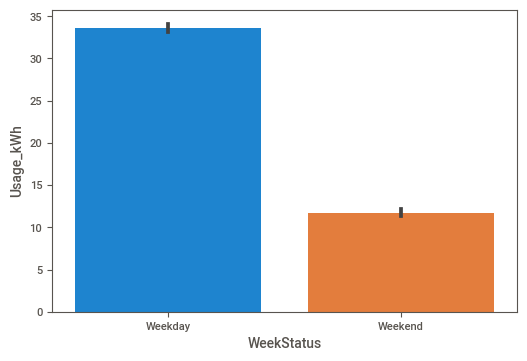

In [18]:
sns.barplot(x='WeekStatus',y='Usage_kWh',data=data)

In [19]:
data['WeekStatus'].value_counts()

Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64

In [20]:
data.Load_Type.unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [21]:
data.Load_Type.value_counts()

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64

<AxesSubplot:xlabel='Load_Type', ylabel='Usage_kWh'>

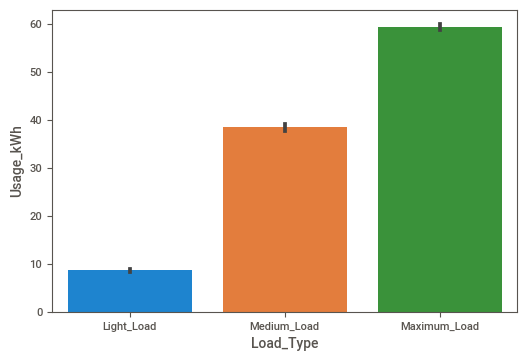

In [22]:
sns.barplot(x='Load_Type',y='Usage_kWh',data=data)

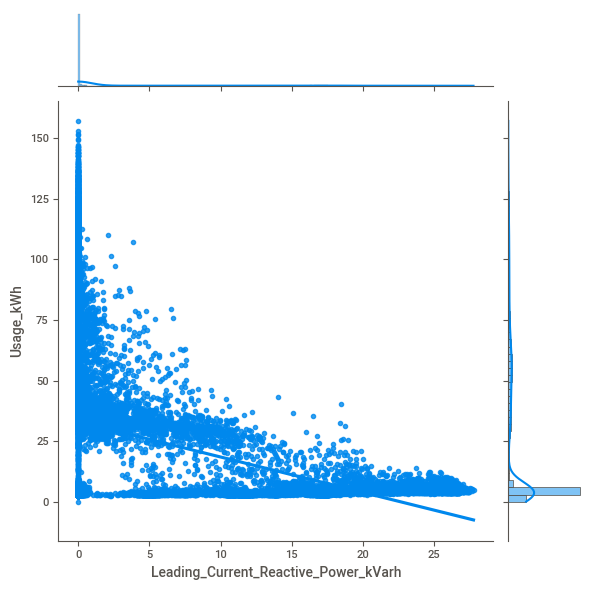

In [23]:
sns.jointplot(x='Leading_Current_Reactive_Power_kVarh',y='Usage_kWh',data=data,kind='reg')

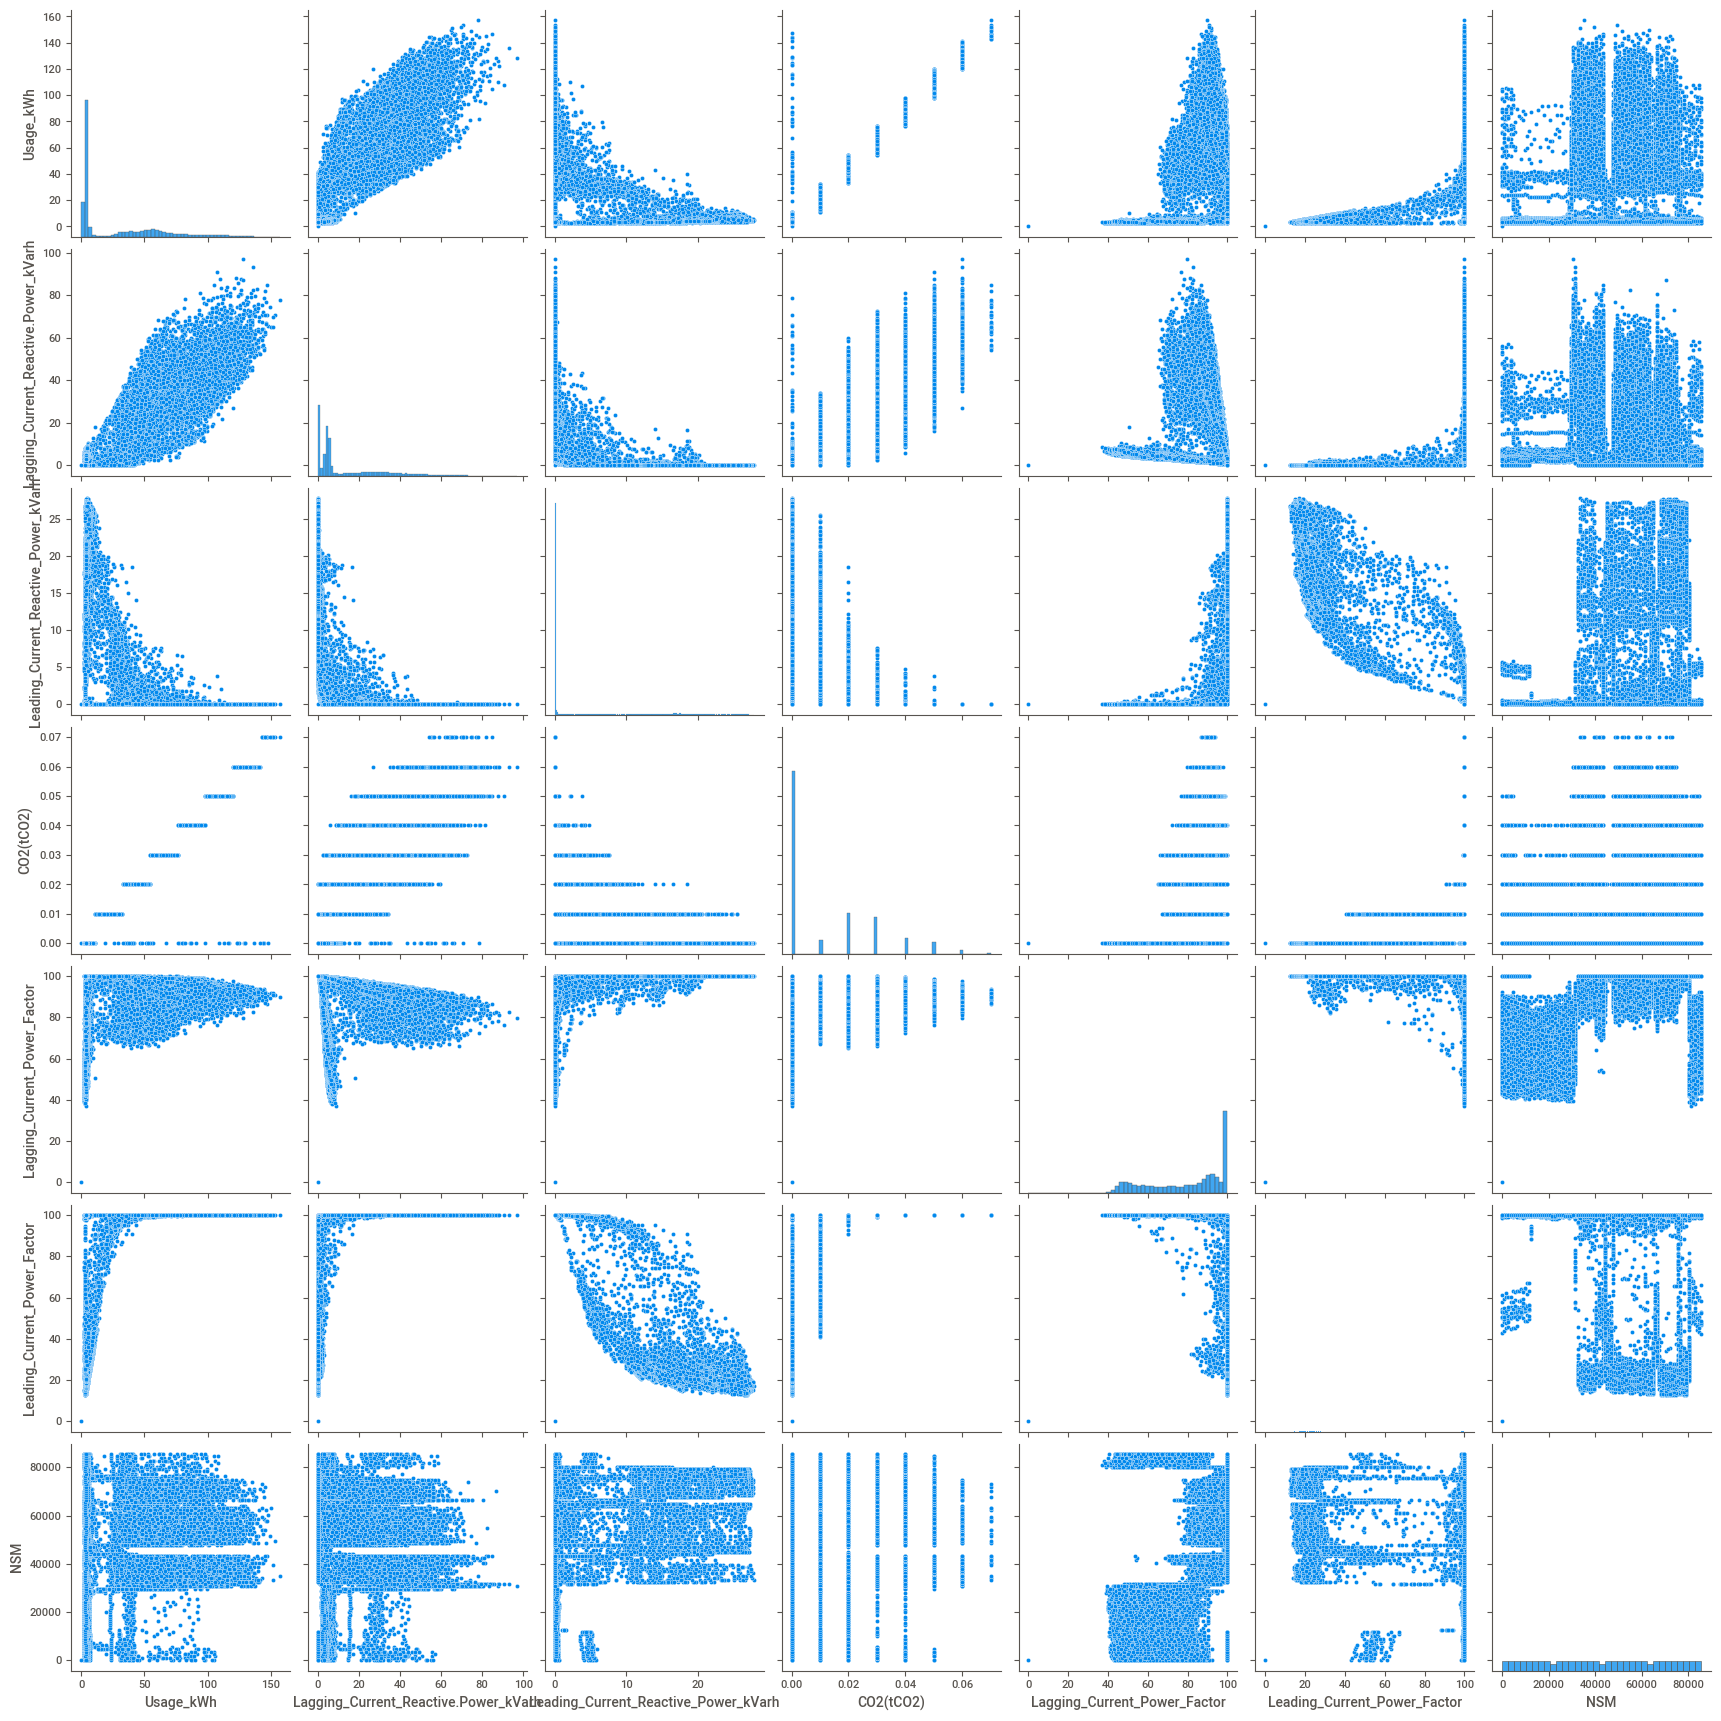

In [24]:
sns.pairplot(data)

In [25]:
data_numerical_features=[i for i in data.columns if data[i].dtypes != 'object']

In [26]:
data_numerical_features

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM']

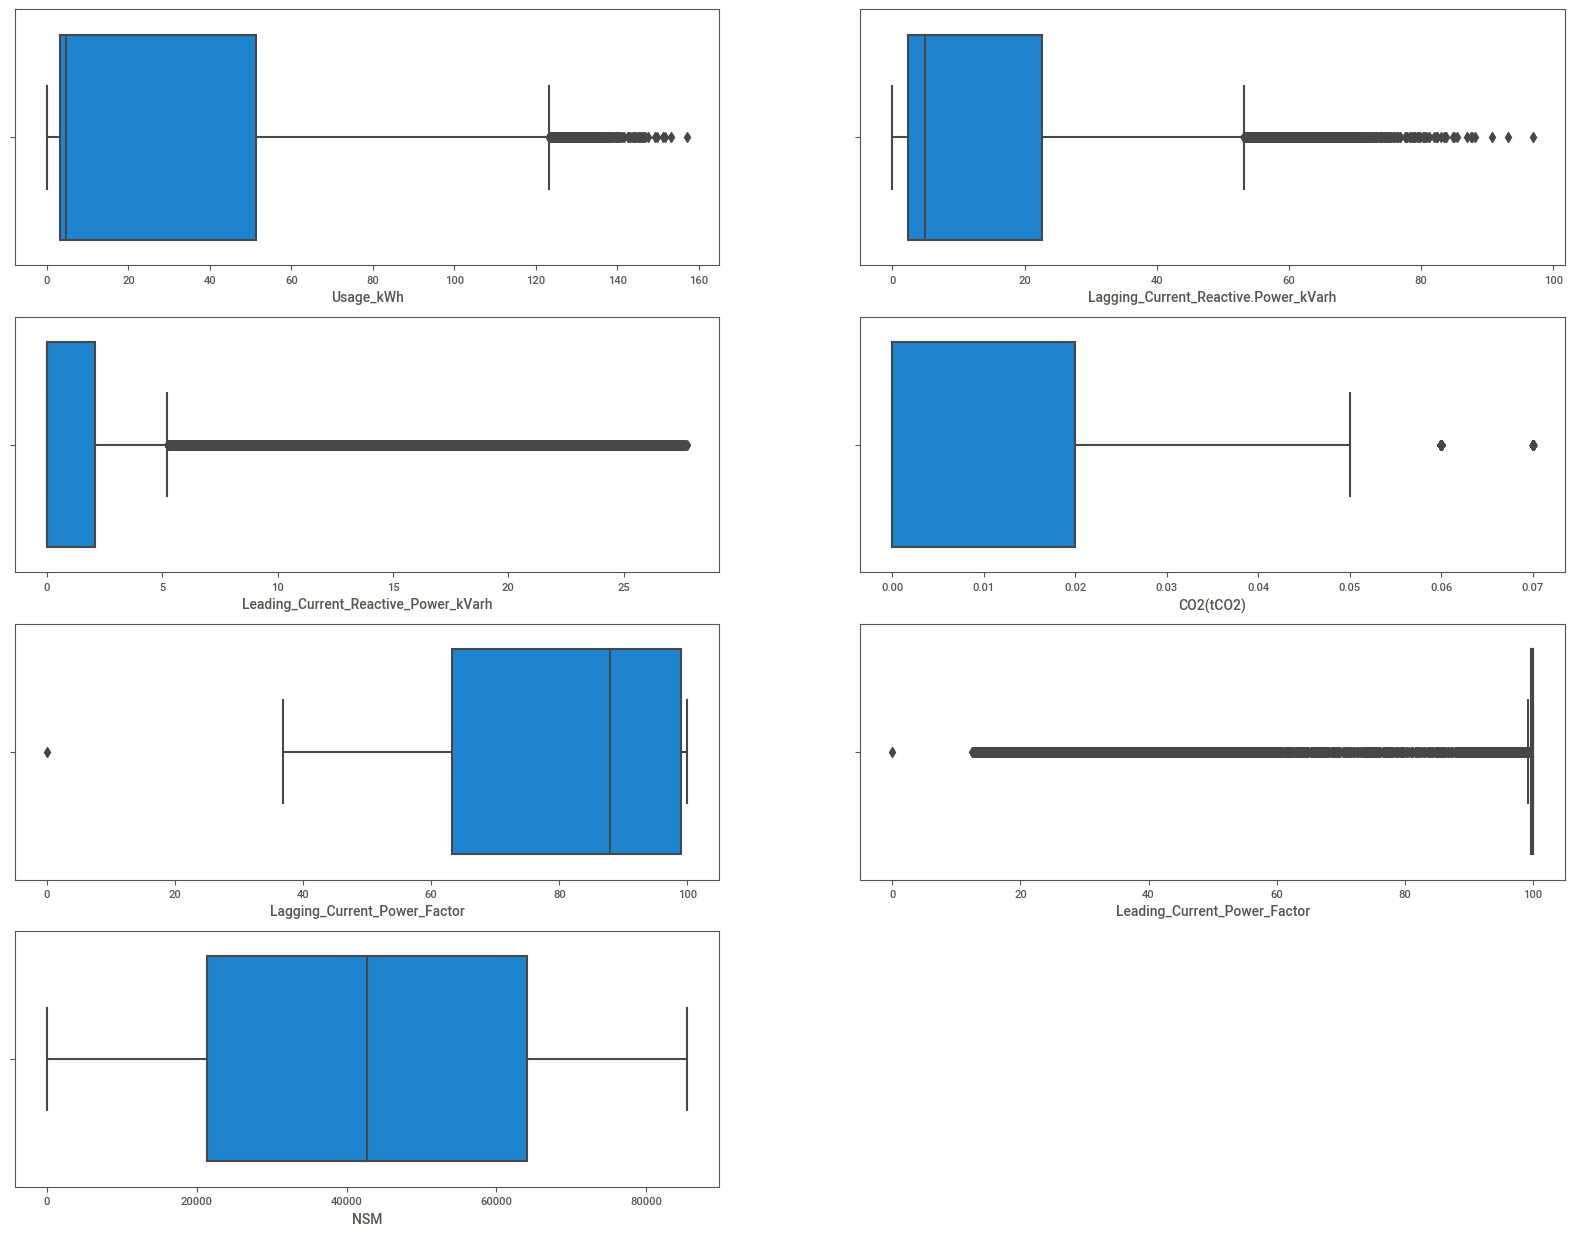

In [27]:
plt.figure(figsize=(20,40))
for i in range(0,len(data_numerical_features)):
    df=data.copy()
    plt.subplot(10,2,i+1)
    sns.boxplot(x=df[data_numerical_features[i]])

In [28]:
def outliers(name):
    q1=data[name].quantile(0.25)
    q3=data[name].quantile(0.75)
    iqr=q3-q1
    lf=q1-1.5*iqr
    uf=q3+1.5*iqr
    ind=data[data[name]<lf].index
    ind1=data[data[name]>uf].index
    
    data.drop(ind,axis=0,inplace=True)
    data.drop(ind1,axis=0,inplace=True)

In [29]:
data['Usage_kWh'].skew()

1.197393822769221

In [30]:
outliers('Usage_kWh')

In [31]:
data['Usage_kWh'].skew()

1.1404497391227262

In [32]:
outliers('Usage_kWh')

In [33]:
data['Usage_kWh'].skew()

1.1327641000904378

<AxesSubplot:xlabel='Usage_kWh'>

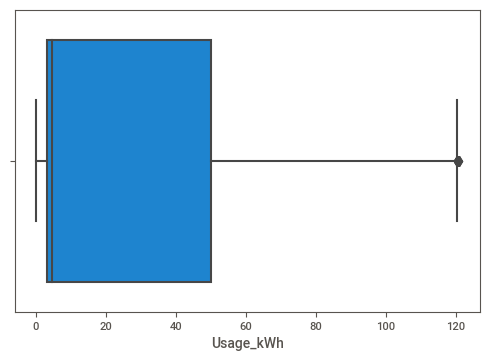

In [34]:
sns.boxplot(x=data['Usage_kWh'])

In [35]:
outliers('Usage_kWh')

<AxesSubplot:xlabel='Usage_kWh'>

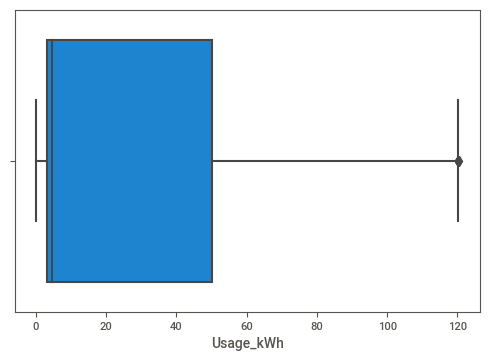

In [36]:
sns.boxplot(x=data['Usage_kWh'])

In [37]:
data.shape

(34608, 11)

In [38]:
outliers('Usage_kWh')

<AxesSubplot:xlabel='Usage_kWh'>

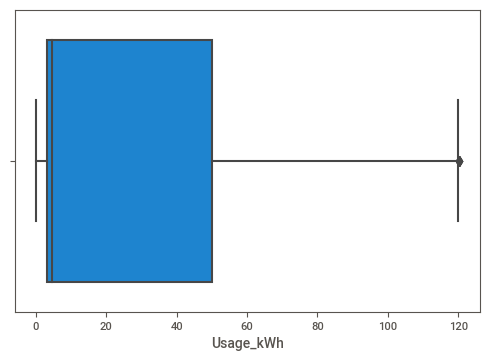

In [39]:
sns.boxplot(x=data['Usage_kWh'])

In [40]:
data.shape

(34601, 11)

<AxesSubplot:xlabel='Usage_kWh'>

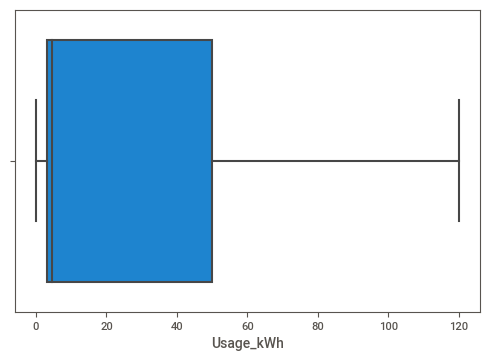

In [41]:
outliers('Usage_kWh')
sns.boxplot(x=data['Usage_kWh'])

In [42]:
data.shape

(34596, 11)

# Data Preprocessing

In [43]:
categorical_features=[i for i in data.columns if data[i].dtypes == 'object']
categorical_features

['date', 'WeekStatus', 'Day_of_week', 'Load_Type']

In [44]:
for i in range(1,len(categorical_features)):
    le=LabelEncoder()
    data[categorical_features[i]]=le.fit_transform(data[categorical_features[i]])
    
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0


In [45]:
data.corr()


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
Usage_kWh,1.000000,0.886282,-0.325078,0.989508,0.389096,0.355966,0.240166,-0.290602,0.034874,0.446945
Lagging_Current_Reactive.Power_kVarh,0.886282,1.000000,-0.409170,0.878790,0.133394,0.412179,0.079109,-0.316313,0.039441,0.241614
Leading_Current_Reactive_Power_kVarh,-0.325078,-0.409170,1.000000,-0.333557,0.532503,-0.943847,0.374631,0.257561,-0.018677,0.230242
CO2(tCO2),0.989508,0.878790,-0.333557,1.000000,0.382331,0.362891,0.237072,-0.285562,0.032212,0.440750
Lagging_Current_Power_Factor,0.389096,0.133394,0.532503,0.382331,1.000000,-0.525587,0.565600,0.058648,0.000221,0.558792
Leading_Current_Power_Factor,0.355966,0.412179,-0.943847,0.362891,-0.525587,1.000000,-0.363503,-0.312095,0.020029,-0.137189
NSM,0.240166,0.079109,0.374631,0.237072,0.565600,-0.363503,1.000000,0.001898,-0.000228,0.594507
WeekStatus,-0.290602,-0.316313,0.257561,-0.285562,0.058648,-0.312095,0.001898,1.000000,-0.156019,-0.199991
Day_of_week,0.034874,0.039441,-0.018677,0.032212,0.000221,0.020029,-0.000228,-0.156019,1.000000,0.011029
Load_Type,0.446945,0.241614,0.230242,0.440750,0.558792,-0.137189,0.594507,-0.199991,0.011029,1.000000


<AxesSubplot:>

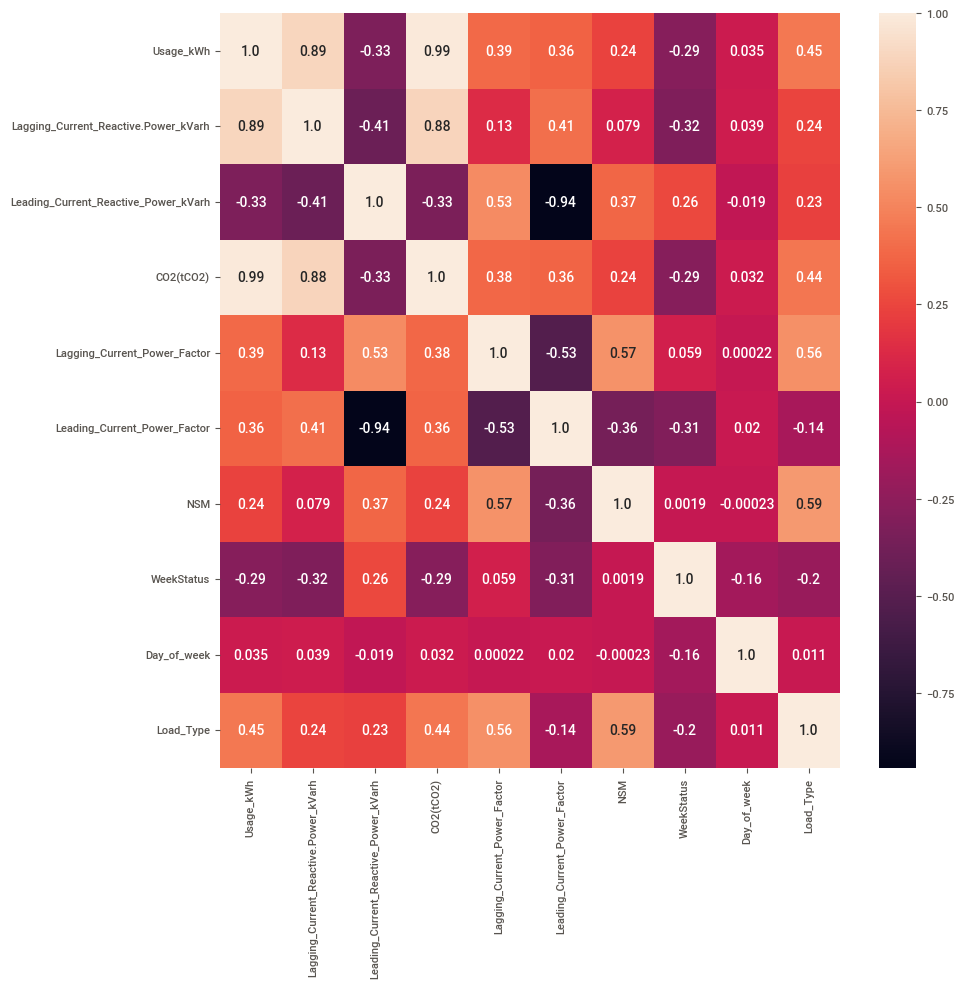

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='0.2')

# Feature Engineering

In [47]:
x=data.loc[:,['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','NSM','WeekStatus','Load_Type']]
y=data.loc[:,'Usage_kWh']

In [48]:
x.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,NSM,WeekStatus,Load_Type
0,2.95,0.0,0.0,73.21,900,0,0
1,4.46,0.0,0.0,66.77,1800,0,0
2,3.28,0.0,0.0,70.28,2700,0,0
3,3.56,0.0,0.0,68.09,3600,0,0
4,4.50,0.0,0.0,64.72,4500,0,0


In [49]:
y.head()

0    3.17
1    4.00
2    3.24
3    3.31
4    3.82
Name: Usage_kWh, dtype: float64

# Predictive Modelling

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [51]:
x_train.shape

(27676, 7)

In [52]:
x_test.shape

(6920, 7)

Linear Regression

In [53]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
y_pred1=lr.predict(x_test)
y_pred1

array([  2.11252662, 103.19186912,  80.06579186, ...,  68.71953443,
        65.63155237,   3.81045817])

In [55]:
y_test

23348      3.06
31739    107.42
7664      89.50
1755      85.07
19967      2.81
          ...  
10432     61.24
15078      3.49
27725     61.78
17840     65.23
121        3.20
Name: Usage_kWh, Length: 6920, dtype: float64

In [56]:
r2_score(y_test,y_pred1)

0.982430248103228

In [57]:
mean_absolute_error(y_test,y_pred1)

2.5020253788778715

In [58]:
mean_squared_error(y_test,y_pred1)

17.104918520578202

In [59]:
se=StandardScaler()
x_train1=se.fit_transform(x_train)
x_test1=se.transform(x_test)

In [60]:
x_train1

array([[-0.80164858,  1.69505854, -0.71448909, ...,  0.66692574,
        -0.63579208, -0.87957848],
       [ 1.84857332, -0.52571953,  2.54890332, ..., -0.37513267,
        -0.63579208,  1.45662248],
       [-0.57353471, -0.51633218, -0.71448909, ...,  1.63711805,
        -0.63579208, -0.87957848],
       ...,
       [-0.80164858,  2.70889201, -0.71448909, ...,  0.23572916,
        -0.63579208, -0.87957848],
       [-0.80164858,  3.01331026, -0.71448909, ...,  1.45745281,
        -0.63579208,  1.45662248],
       [-0.5549524 , -0.52571953, -0.71448909, ..., -1.63278937,
        -0.63579208, -0.87957848]])

In [61]:
lr.fit(x_train1,y_train)

LinearRegression()

In [62]:
y_pred1a=lr.predict(x_test1)

In [63]:
r2_score(y_test,y_pred1a)

0.9824302481032353

KNN Regressor

In [64]:
knn=KNeighborsRegressor()
knn.fit(x_train1,y_train)

KNeighborsRegressor()

In [65]:
y_pred_knn=knn.predict(x_test1)
y_pred_knn

array([  3.112, 110.01 ,  84.672, ...,  61.386,  65.188,   3.226])

In [66]:
r2_score(y_test,y_pred_knn)

0.9947629729068197

In [67]:
mean_absolute_error(y_test,y_pred_knn)

1.1483528901734106

In [68]:
mean_squared_error(y_test,y_pred_knn)

5.098473913872833

Decision Tree

In [69]:
dt=DecisionTreeRegressor()
dt.fit(x_train1,y_train)

DecisionTreeRegressor()

In [70]:
y_pred_dt=dt.predict(x_test1)
y_pred_dt

array([  3.02, 106.7 ,  91.62, ...,  61.52,  64.91,   3.17])

In [71]:
r2_score(y_test,y_pred_dt)

0.9975628308786127

In [72]:
mean_absolute_error(y_test,y_pred_dt)

0.6389020953757226

In [73]:
mean_squared_error(y_test,y_pred_dt)

2.372690262624438

In [74]:
data.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

Random Forest

In [75]:
rf=RandomForestRegressor()
rf.fit(x_train1,y_train)

RandomForestRegressor()

In [76]:
y_pred_rf=rf.predict(x_test1)

In [77]:
y_pred_rf

array([  3.0592, 107.3527,  89.2268, ...,  61.676 ,  65.3383,   3.1903])

In [78]:
r2_score(y_test,y_pred_rf)

0.9988704722083447

In [79]:
mean_absolute_error(y_test,y_pred_rf)

0.424660095729054

In [80]:
mean_squared_error(y_test,y_pred_rf)

1.0996444888070136

Support Vector Machine

In [81]:
svreg=SVR()
svreg.fit(x_train1,y_train)

SVR()

In [82]:
y_pred_svreg=svreg.predict(x_test1)
y_pred_svreg

array([  3.02541506, 106.48780328,  77.14284521, ...,  62.19767514,
        65.06230752,   3.16449383])

In [83]:
r2_score(y_test,y_pred_svreg)

0.9930077660588412

In [84]:
mean_squared_error(y_test,y_pred_svreg)

6.807244208287141

In [85]:
mean_absolute_error(y_test,y_pred_svreg)

1.2467172990624114

| Model_Name | r2_score | mean_absolute_error |
| :- | -: | :-: |
| LinearRegression | 0.9824 | 2.5020
| KNN | 0.9947 | 1.1483
| DecisionTree | 0.9978 | 0.6266
| RandomForest | 0.9988 | 0.4256
| SupportVectorMachine | 0.9930 | 1.24

# Conclusion

Random Forest shows highest r2 score of 99.88% and most accurate prediction for the power consumption